# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 55.0MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [3]:
df = pd.read_csv('/content/Traffic Data.csv')

In [4]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [5]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00
19999,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds,2018-05-31 18:00:00


In [6]:
df.sample(15)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
2466,2836.0,269.50,0.00,0.0,90,Snow,light snow,2017-11-10 21:00:00
14170,717.0,269.36,0.00,0.0,75,Clouds,broken clouds,2017-01-28 05:00:00
9849,1855.0,254.35,0.00,0.0,5,Clear,sky is clear,2018-02-04 20:00:00
2779,5332.0,294.35,0.00,0.0,1,Clear,sky is clear,2018-05-03 13:00:00
12749,2164.0,284.62,0.00,0.0,90,Rain,heavy intensity rain,2017-04-25 21:00:00
15214,4594.0,269.15,0.00,0.0,1,Clear,sky is clear,2017-03-09 10:00:00
12860,683.0,284.15,0.00,0.0,40,Clouds,scattered clouds,2017-05-07 02:00:00
16934,4747.0,299.44,0.00,0.0,40,Clouds,scattered clouds,2017-08-07 18:00:00
15700,476.0,293.73,0.00,0.0,1,Clear,sky is clear,2018-07-08 05:00:00
5100,233.0,275.46,0.00,0.0,90,Mist,mist,2016-11-29 02:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [8]:
df.shape

(20000, 8)

In [9]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)
df.sort_index(inplace=True)

In [10]:
df.head(4)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog


<Axes: xlabel='date_time'>

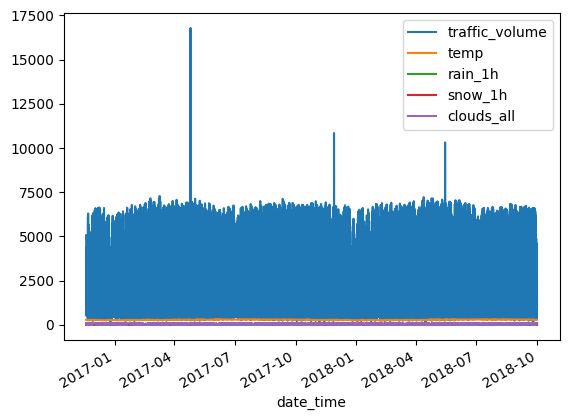

In [12]:
df.plot()

<Axes: title={'center': 'traffic_volume'}, xlabel='date_time'>

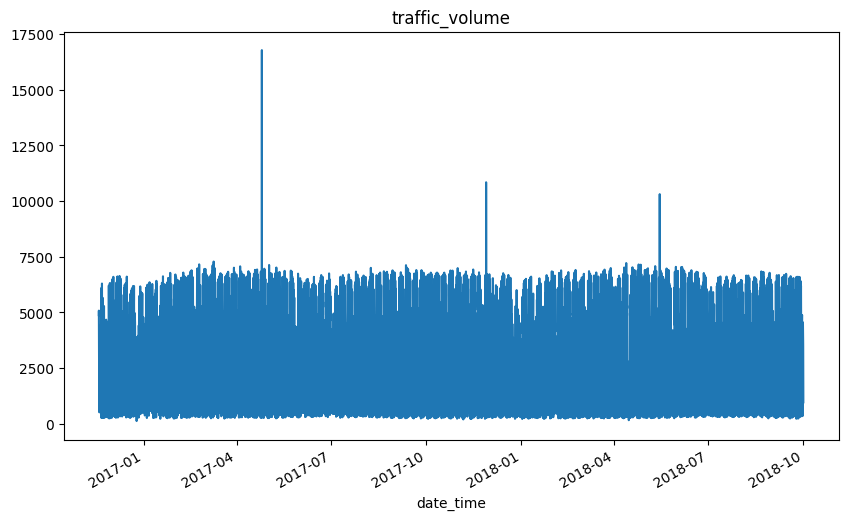

In [11]:
df['traffic_volume'].plot(title='traffic_volume', figsize=(10, 6))

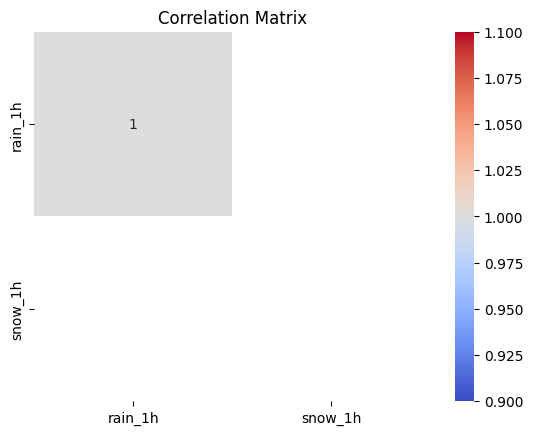

In [16]:
# Select only numeric columns
numeric_df = df[['rain_1h', 'snow_1h']]

# Correlation Matrix
correlation_matrix = numeric_df.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


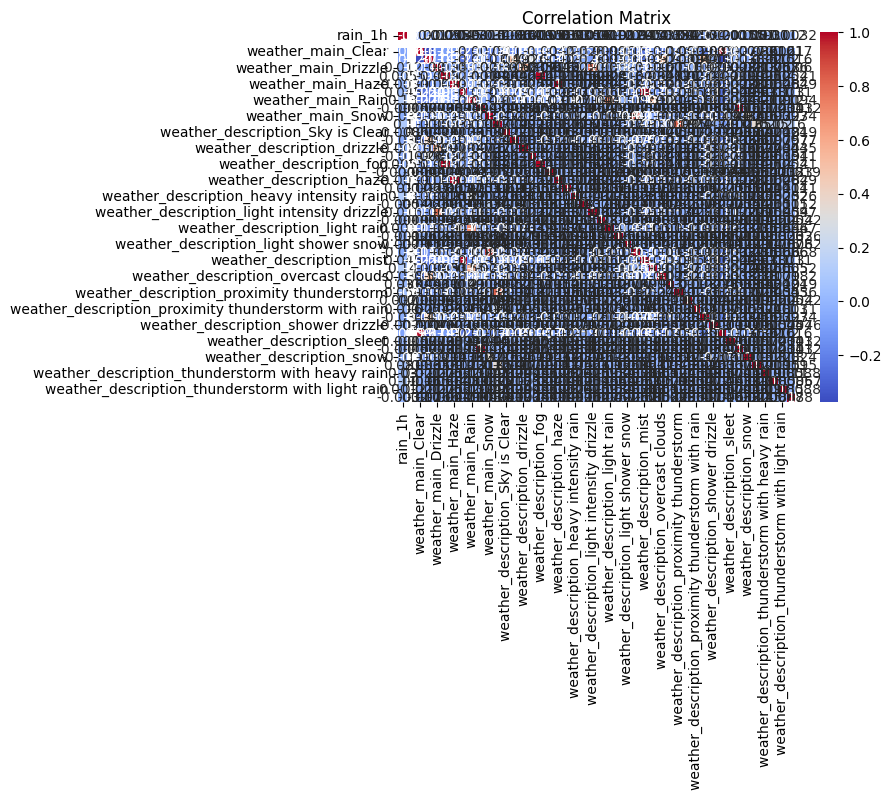

In [17]:
# One-hot encode categorical columns
encoded_df = pd.get_dummies(df[['weather_main', 'weather_description']])

# Combine with numeric columns
combined_df = pd.concat([df[['rain_1h', 'snow_1h']], encoded_df], axis=1)

# Correlation Matrix
correlation_matrix = combined_df.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

# Access the 'traffic_volume' row
traffic_volume_corr = corr_matrix.loc['traffic_volume']
print(traffic_volume_corr)


traffic_volume    1.000000
temp              0.132268
rain_1h           0.012803
snow_1h                NaN
clouds_all        0.094228
Name: traffic_volume, dtype: float64


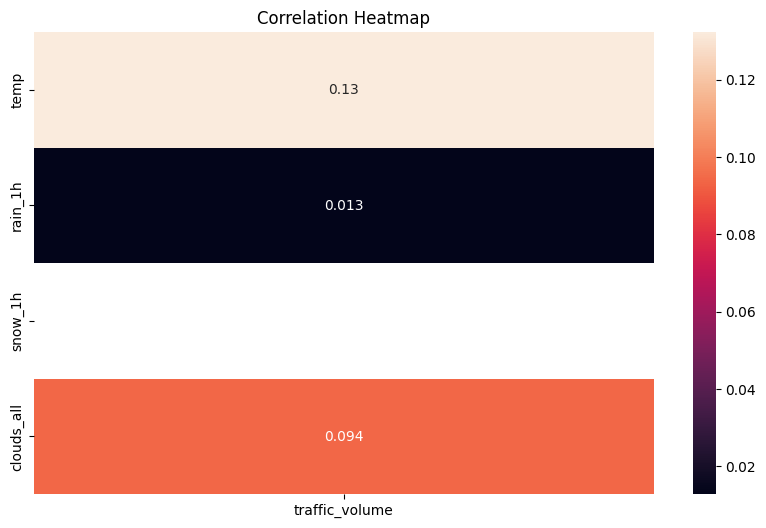

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr().loc[['traffic_volume']].drop('traffic_volume',axis=1).transpose(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description'],
      dtype='object')

In [23]:
features = ['temp','rain_1h','clouds_all']
target = ['traffic_volume']

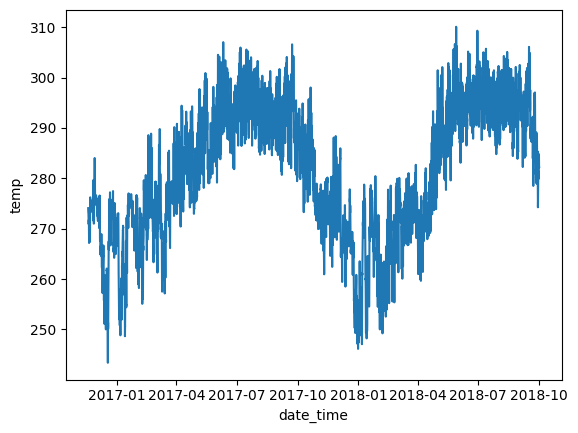

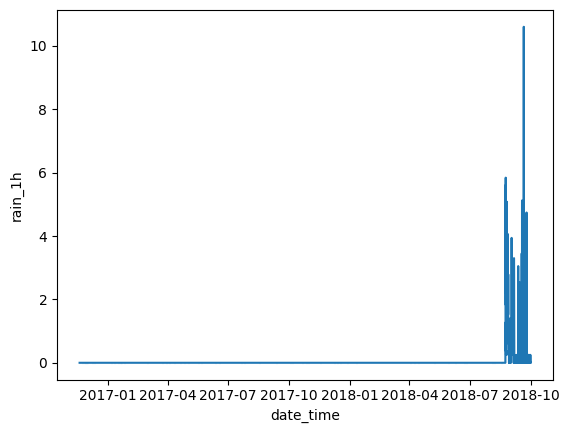

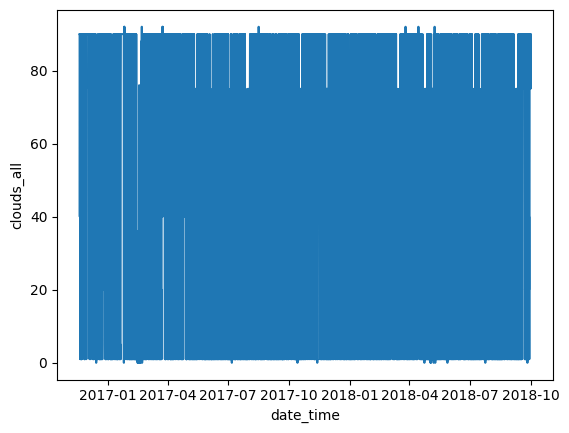

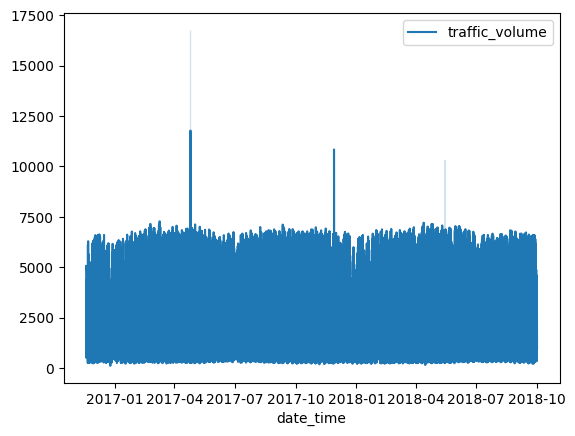

In [24]:
for feature in features:
  sns.lineplot(df[feature])
  plt.show()
sns.lineplot(df[target])
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [25]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [26]:
df.fillna(method='bfill',inplace=True)

<ipython-input-26-71c2b11f6341>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


In [28]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


<Axes: xlabel='date_time'>

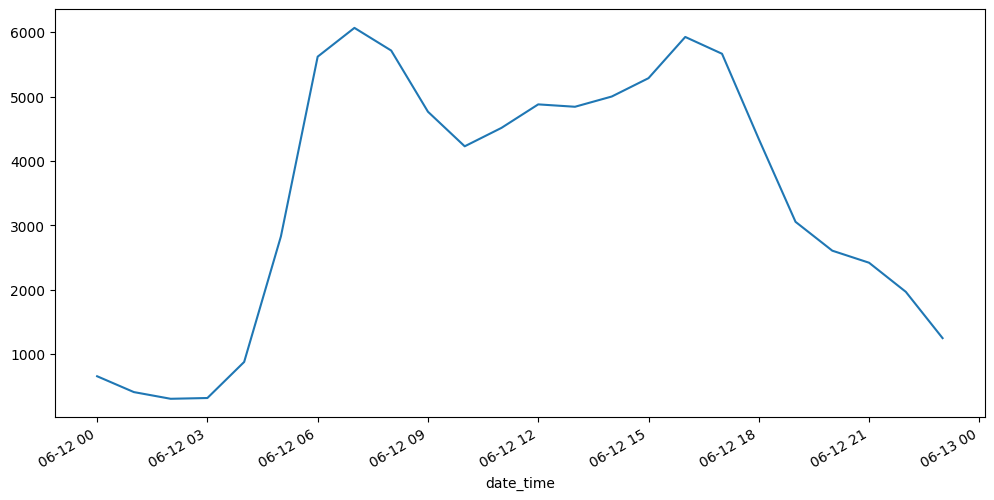

In [70]:
df['traffic_volume'].loc['2017-6-12'].plot( figsize=(12, 6))

<Axes: xlabel='date_time'>

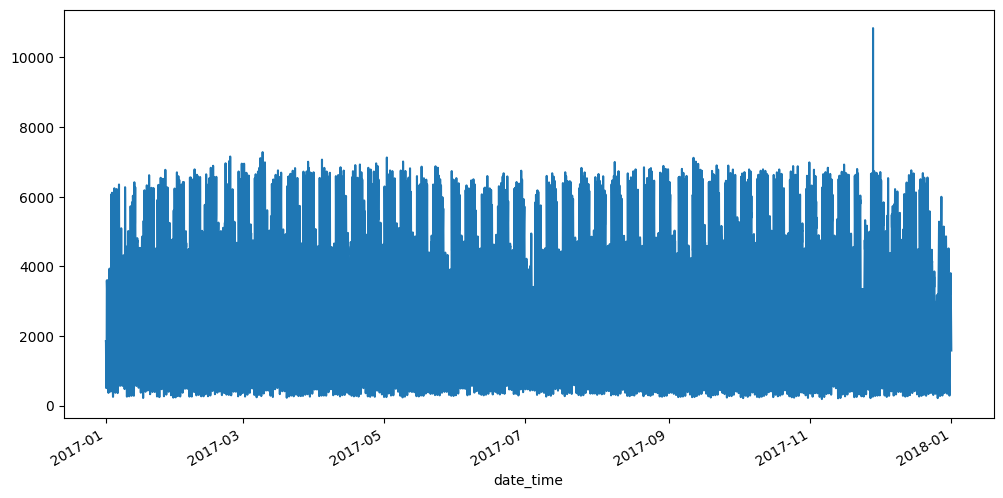

In [44]:
df['traffic_volume'].loc['2017'].plot( figsize=(12, 6))

In [40]:
from scipy.stats import zscore

imputed_series = df['traffic_volume'].copy()

window_size = 30
for i in range(window_size-window_size, len(df) - window_size, window_size):
    window = df['traffic_volume'].iloc[i - window_size:i]
    z_scores = zscore(window)

    outliers = np.where(np.abs(z_scores) > 3)[0]

    for outlier in outliers:
        imputed_series.iloc[i - window_size + outlier] = np.nan

imputed_series.ffill(inplace=True)


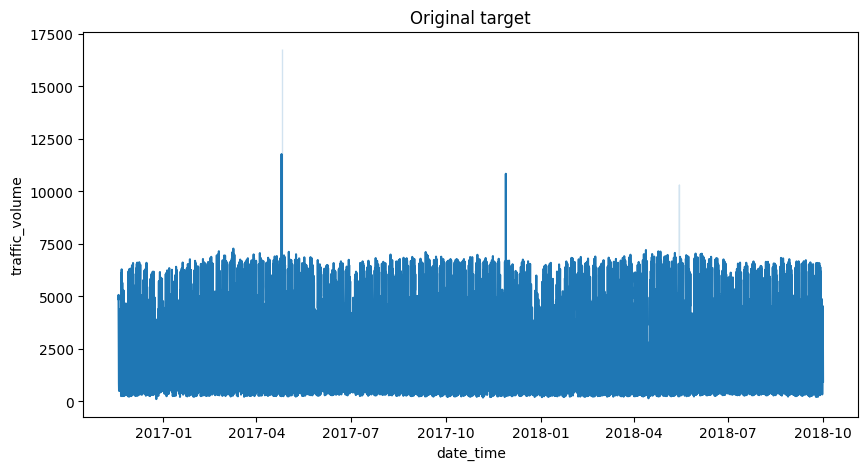

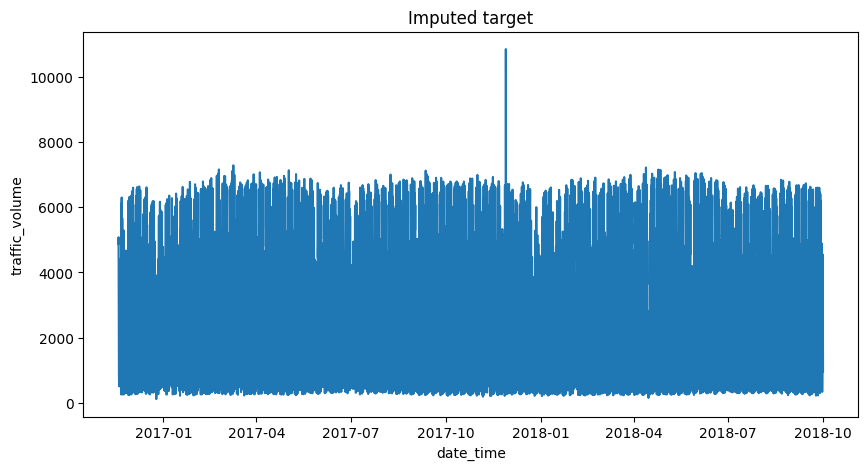

In [41]:
plt.figure(figsize=(10, 5))
sns.lineplot(df['traffic_volume'])
plt.title('Original target')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(imputed_series)
plt.title('Imputed target')
plt.show()

In [42]:
df['traffic_volume'] = imputed_series

<ipython-input-72-b98a0deeee06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_MA30'] = df['traffic_volume'].rolling(window=30).mean()


<Axes: xlabel='date_time'>

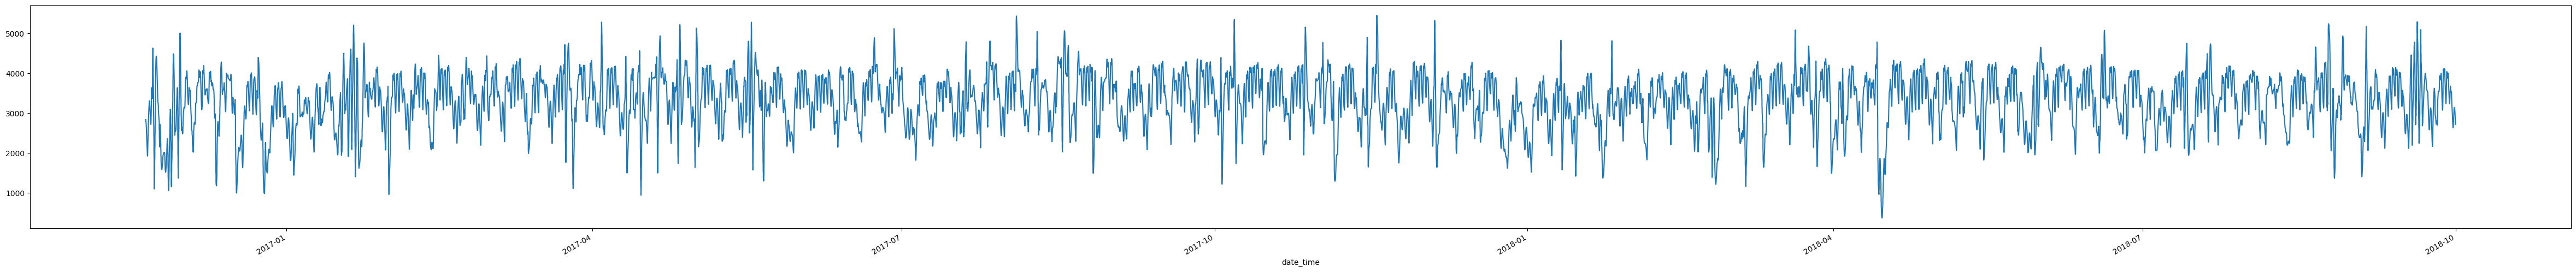

In [72]:
df['traffic_MA30'] = df['traffic_volume'].rolling(window=30).mean()
df['traffic_MA30'].plot( figsize=(60, 6))

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [47]:
df['traffic_MA30'].head(30)

,traffic_MA30
date_time,
2016-11-18 15:00:00,NaN
2016-11-18 15:00:00,NaN
2016-11-18 15:00:00,NaN
2016-11-18 16:00:00,NaN
2016-11-18 16:00:00,NaN
2016-11-18 16:00:00,NaN
2016-11-18 17:00:00,NaN
2016-11-18 17:00:00,NaN
2016-11-18 17:00:00,NaN


In [48]:
df.traffic_MA30.isnull().sum()

29

In [49]:
df.dropna(inplace=True)

In [50]:
df.shape

(19971, 8)

In [51]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'traffic_MA30'],
      dtype='object')

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [52]:
df = df[['traffic_volume', 'traffic_MA30']]

In [53]:
train_data , test_data = train_test_split(df[['traffic_volume', 'traffic_MA30']] , test_size=0.3, shuffle=False)
val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [54]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

train_data['traffic_volume'] = target_scaler.fit_transform(train_data[['traffic_volume']])
train_data['traffic_MA30'] = feature_scaler.fit_transform(train_data[['traffic_MA30']])
val_data['traffic_volume'] = target_scaler.transform(val_data[['traffic_volume']])
val_data['traffic_MA30'] = feature_scaler.transform(val_data[['traffic_MA30']])
test_data['traffic_volume'] = target_scaler.transform(test_data[['traffic_volume']])
test_data['traffic_MA30'] = feature_scaler.transform(test_data[['traffic_MA30']])

In [55]:
train_data.head()

,traffic_volume,traffic_MA30
date_time,,
2016-11-19 09:00:00,0.315657,0.399109
2016-11-19 10:00:00,0.346505,0.391420
2016-11-19 11:00:00,0.388816,0.387084
2016-11-19 12:00:00,0.398509,0.383517
2016-11-19 13:00:00,0.393197,0.378036


In [56]:
train_data = train_data.values
val_data = val_data.values
test_data = test_data.values

In [57]:
win_size = 30

train_ds = timeseries_dataset_from_array(
    train_data,
    targets=train_data[win_size:,0],
    sequence_length=win_size,
    batch_size=32
)

test_ds = timeseries_dataset_from_array(
    test_data,
    targets=test_data[win_size:,0],
    sequence_length=win_size,
    batch_size=32
)

val_ds = timeseries_dataset_from_array(
    val_data,
    targets=val_data[win_size:,0],
    sequence_length=win_size,
    batch_size=32
)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [61]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units=64, return_sequences=True))
RNN_model.add(Dropout(0.2))
RNN_model.add(SimpleRNN(units=128))
RNN_model.add(Dropout(0.2))
RNN_model.add(Dense(units=1))
RNN_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [63]:
RNN_history = RNN_model.fit(train_ds, epochs=30, validation_data=val_ds,callbacks=early_stopping)

Epoch 1/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.0718 - mae: 0.1882 - val_loss: 0.0034 - val_mae: 0.0424
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0076 - mae: 0.0676 - val_loss: 0.0030 - val_mae: 0.0394
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.0056 - mae: 0.0567 - val_loss: 0.0030 - val_mae: 0.0402
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0048 - mae: 0.0519 - val_loss: 0.0030 - val_mae: 0.0386
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.0043 - mae: 0.0481 - val_loss: 0.0029 - val_mae: 0.0389
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 0.0042 - mae: 0.0473 - val_loss: 0.0030 - val_mae: 0.0397
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.0039 - mae: 0.0459 - val_loss: 0.0030 - val_mae: 0.0401
Epoch 8/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 0.0038 - mae: 0.0444 - val_loss: 0.0029 - val_mae: 0.0388


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [64]:
rnn_predictions = RNN_model.predict(train_ds)
rnn_predictions_test = RNN_model.predict(test_ds)
rnn_predictions_val = RNN_model.predict(val_ds)

436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [65]:
rnn_predictions = target_scaler.inverse_transform(rnn_predictions)
rnn_predictions_test = target_scaler.inverse_transform(rnn_predictions_test)
rnn_predictions_val = target_scaler.inverse_transform(rnn_predictions_val)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [66]:
df.head()

,traffic_volume,traffic_MA30
date_time,,
2016-11-19 09:00:00,3500.0,2742.300000
2016-11-19 10:00:00,3831.0,2707.600000
2016-11-19 11:00:00,4285.0,2688.033333
2016-11-19 12:00:00,4389.0,2671.933333
2016-11-19 13:00:00,4332.0,2647.200000


In [67]:
print(f'Test MAE: {mean_absolute_error(test_data[win_size:,0], rnn_predictions_test.flatten())}')

Test MAE: 3300.101403921368


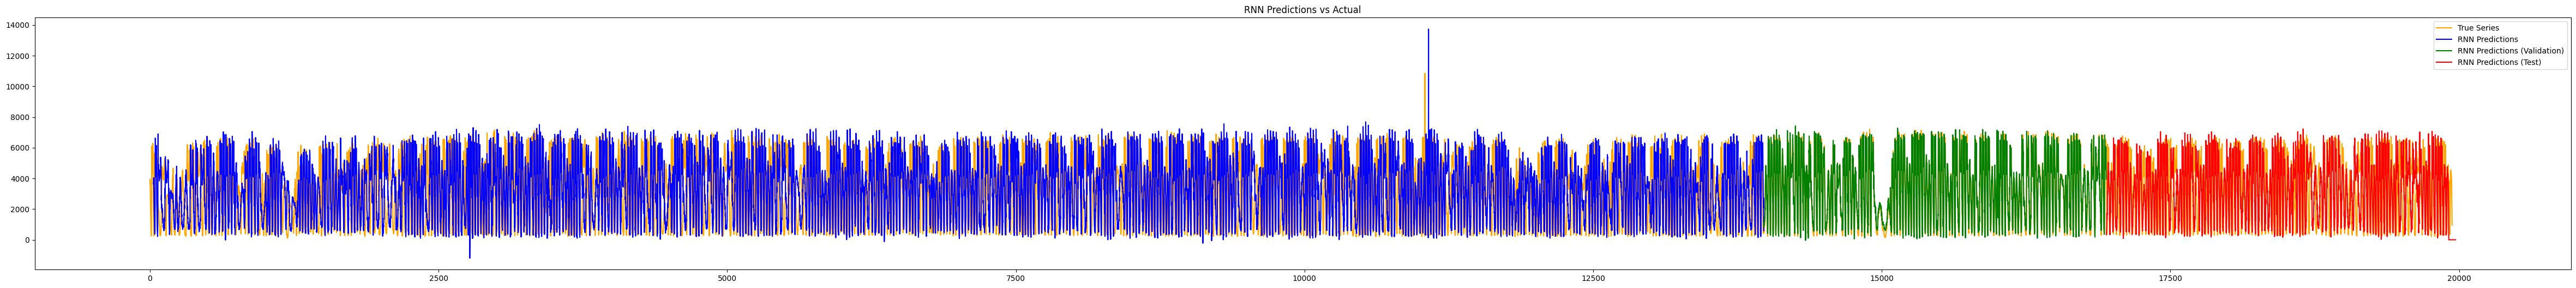

In [75]:
import matplotlib.pyplot as plt
rnn_arr = np.zeros(len(df))
rnn_arr[:win_size] = np.nan


#RNN

rnn_arr[win_size:len(rnn_predictions)+win_size] = rnn_predictions.flatten()
rnn_arr[len(rnn_predictions)+win_size:len(rnn_predictions)+len(rnn_predictions_val)+win_size] = rnn_predictions_val.flatten()
rnn_arr[len(rnn_predictions)+len(rnn_predictions_val)+win_size:len(rnn_predictions)+len(rnn_predictions_val)+len(rnn_predictions_test)+win_size] = rnn_predictions_test.flatten()

plt.figure(figsize=(60, 6))
plt.plot(df.iloc[win_size:,0].values, label='True Series',color='orange')
plt.plot(rnn_arr[:len(rnn_predictions)+win_size], label='RNN Predictions', color='blue')
plt.plot(np.arange(len(rnn_predictions)+win_size, len(rnn_predictions)+len(rnn_predictions_val)+win_size),
         rnn_arr[len(rnn_predictions)+win_size:len(rnn_predictions)+len(rnn_predictions_val)+win_size],
         label='RNN Predictions (Validation)', color='green')
plt.plot(np.arange(len(rnn_predictions)+len(rnn_predictions_val)+win_size, len(rnn_arr)),
         rnn_arr[len(rnn_predictions)+len(rnn_predictions_val)+win_size:],
         label='RNN Predictions (Test)', color='red')

plt.legend()
plt.title('RNN Predictions vs Actual')
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [76]:
GRU_model = Sequential()
GRU_model.add(GRU(units=64, return_sequences=True))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(units=128))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(units=1))
GRU_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [77]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [78]:
GRU_history = GRU_model.fit(train_ds, epochs=30, validation_data=val_ds,callbacks=early_stopping)

Epoch 1/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - loss: 0.0126 - mae: 0.0823 - val_loss: 0.0037 - val_mae: 0.0426
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - loss: 0.0040 - mae: 0.0458 - val_loss: 0.0032 - val_mae: 0.0396
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - loss: 0.0035 - mae: 0.0432 - val_loss: 0.0026 - val_mae: 0.0372
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - loss: 0.0033 - mae: 0.0420 - val_loss: 0.0025 - val_mae: 0.0366
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - loss: 0.0031 - mae: 0.0407 - val_loss: 0.0024 - val_mae: 0.0356
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - loss: 0.0030 - mae: 0.0402 - val_loss: 0.0024 - val_mae: 0.0355
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - loss: 0.0030 - mae: 0.0394 - val_loss: 0.0023 - val_mae: 0.0344
Epoch 8/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - loss: 0.0029 - mae: 0.0392 - val_loss: 0.0022 - val_mae: 0.0343
Epoch 9/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [80]:
GRU_predictions = GRU_model.predict(train_ds)
GRU_predictions_test = GRU_model.predict(test_ds)
GRU_predictions_val = GRU_model.predict(val_ds)

436/436 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [81]:
GRU_predictions = target_scaler.inverse_transform(GRU_predictions)
GRU_predictions_test = target_scaler.inverse_transform(GRU_predictions_test)
GRU_predictions_val = target_scaler.inverse_transform(GRU_predictions_val)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [82]:
print(f'Test MAE: {mean_absolute_error(test_data[win_size:,0], GRU_predictions_test.flatten())}')

Test MAE: 3251.969374574136


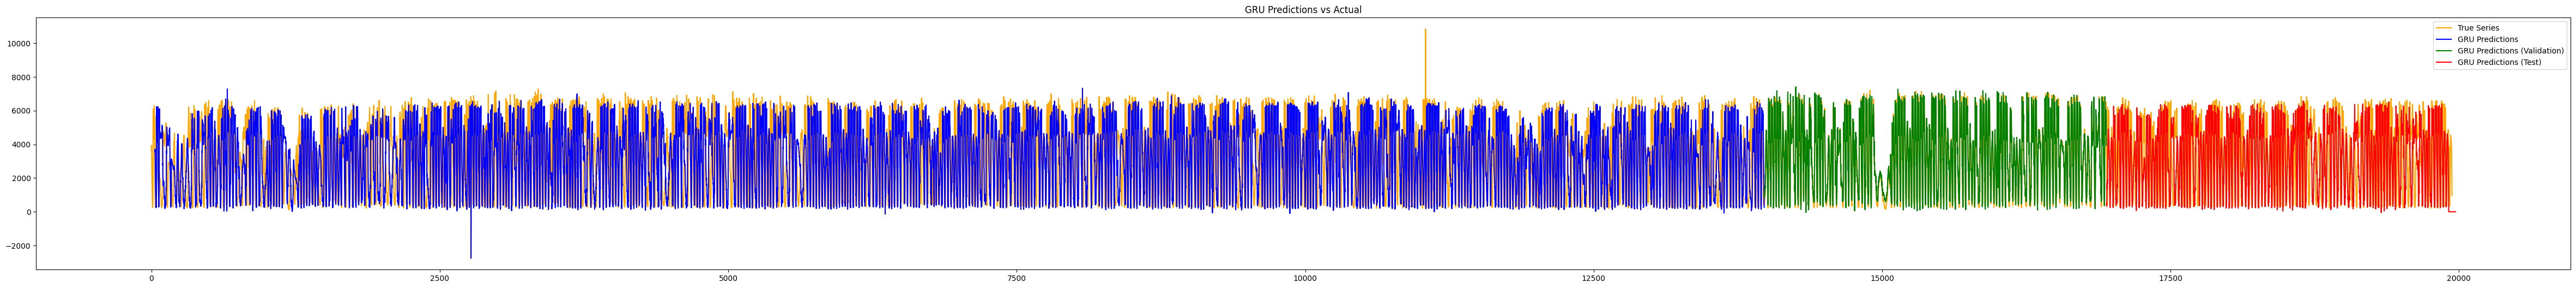

In [83]:
import matplotlib.pyplot as plt
GRU_arr = np.zeros(len(df))
GRU_arr[:win_size] = np.nan


#GRU

GRU_arr[win_size:len(GRU_predictions)+win_size] = GRU_predictions.flatten()
GRU_arr[len(GRU_predictions)+win_size:len(GRU_predictions)+len(GRU_predictions_val)+win_size] = GRU_predictions_val.flatten()
GRU_arr[len(GRU_predictions)+len(GRU_predictions_val)+win_size:len(GRU_predictions)+len(GRU_predictions_val)+len(GRU_predictions_test)+win_size] = GRU_predictions_test.flatten()

plt.figure(figsize=(60, 6))
plt.plot(df.iloc[win_size:,0].values, label='True Series',color='orange')
plt.plot(GRU_arr[:len(GRU_predictions)+win_size], label='GRU Predictions', color='blue')
plt.plot(np.arange(len(GRU_predictions)+win_size, len(GRU_predictions)+len(GRU_predictions_val)+win_size),
         rnn_arr[len(GRU_predictions)+win_size:len(GRU_predictions)+len(GRU_predictions_val)+win_size],
         label='GRU Predictions (Validation)', color='green')
plt.plot(np.arange(len(GRU_predictions)+len(GRU_predictions_val)+win_size, len(GRU_arr)),
         GRU_arr[len(GRU_predictions)+len(GRU_predictions_val)+win_size:],
         label='GRU Predictions (Test)', color='red')

plt.legend()
plt.title('GRU Predictions vs Actual')
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: 1.  handlling missing values in traffic volume by using backword method and use MinMaxScaler for normaliztion data in range (0,1).

###2. feature engineering 30-day moving average feature MA it is help to reduce noise and capture the underlying trend in the traffic data

###3. Model Architecture i used RNN and GUR (frist RNN layer with 64 units, secand 128,and drop 20% , final layer dense = 1 for single output predicte traffic volume)


###4. Training Process used batch size of 32 is a common choice as it provides a good balance between training speed and model convergence,optimizer adam and with 30 epochs provide a good balance between allowing the model to learn from the data and avoiding overfitting + add ealy stopping.
 Did you experiment with different values, and what were the outcomes? yse with fixed number of units not good sol.



###5. Loss Function MSE and Metrics MAE


###7.Overfitting and Underfitting: for prevint Overfitting used  ealy stopping, dropout and underfiting more comlecx model.


###8. Future Improvements: using different algorithms and compuer performance and maybe use tuning hyperparameters.